## **Automobile Price Prediction using Regression Models**

## **Steps:**
     
     1. Load all Libraries
     2. Load the Dataset
     3. Split the dataset
     4. Fit the model
     5. Make Predictions
     

In [ ]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import io
ds = pd.read_csv(io.BytesIO(data_to_load['cars.csv']))
ds

,CarName,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,convertible,88.6,168.8,64.1,48.8,2548,130.00,3.47,2.68,9.00,111.0,5000,21,27,13495.0
1,alfa-romero stelvio,gas,convertible,88.6,168.8,64.1,48.8,2548,130.00,3.47,2.68,9.00,111.0,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,94.5,171.2,65.5,52.4,2823,152.00,2.68,3.47,9.00,154.0,5000,19,26,16500.0
3,audi 100 ls,gas,fwd,176.6,66.2,54.3,2337.0,109,3.19,3.40,10.00,102.00,5500.0,24,30,13950,22625.0
4,audi 100ls,gas,sedan,99.4,176.6,66.4,54.3,2824,136.00,3.19,3.40,8.00,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,sedan,109.1,188.8,68.9,55.5,2952,141.00,3.78,3.15,9.50,114.0,5400,23,28,16845.0
201,volvo 144ea,gas,sedan,109.1,188.8,68.8,55.5,3049,141.00,3.78,3.15,8.70,160.0,5300,19,25,19045.0
202,volvo 244dl,gas,sedan,109.1,188.8,68.9,55.5,3012,173.00,3.58,2.87,8.80,134.0,5500,18,23,21485.0
203,volvo 246,diesel,sedan,109.1,188.8,68.9,55.5,3217,145.00,3.01,3.40,23.00,106.0,4800,26,27,22470.0


In [ ]:
# Data has 17 columns and 205 rows.
ds.shape

(205, 17)

In [ ]:
ds.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,99.13122,173.510732,65.849756,64.860000,2544.697561,126.391171,3.327024,3.290683,10.560341,129.939024,5072.624390,51.497561,98.624390,13319.027644
std,8.11291,14.453454,2.293162,159.489763,547.810729,42.512393,0.269786,0.566809,7.563133,379.025566,688.721607,375.443654,972.188954,8015.368039
min,86.60000,66.200000,54.300000,47.800000,109.000000,3.190000,2.540000,2.070000,3.150000,9.500000,24.000000,13.000000,16.000000,5118.000000
25%,94.50000,166.300000,64.000000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.00000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10295.000000
75%,102.40000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,16515.000000
max,176.60000,208.100000,72.300000,2337.000000,4066.000000,326.000000,3.940000,10.000000,102.000000,5500.000000,6600.000000,5400.000000,13950.000000,45400.000000


In [ ]:
ds.columns

Index(['CarName', 'fueltype', 'carbody', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## **No null values in Dataset**

In [ ]:
ds.isnull()      

,CarName,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Checking Null values
ds.isnull().sum()*100/ds.shape[0]
# There are no NULL values in the dataset, hence it is clean.

CarName             0.0
fueltype            0.0
carbody             0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginesize          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [ ]:
ds.price.describe()

count      205.000000
mean     13319.027644
std       8015.368039
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16515.000000
max      45400.000000
Name: price, dtype: float64

## **specifying the inputs and outputs**

In [ ]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1:].values

In [ ]:
# fueltype - Car fuel type i.e gas or diesel
ds['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [ ]:
#carbody- body of car
ds['carbody'].value_counts()

sedan          95
hatchback      70
wagon          25
hardtop         8
convertible     6
fwd             1
Name: carbody, dtype: int64

In [ ]:
#wheelbase - Weelbase of car 
ds['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

In [ ]:
#carlength - Length of car
ds['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
186.7     7
171.7     7
Name: carlength, dtype: int64

In [ ]:
#enginesize - size of engine.
ds['enginesize'].value_counts().head()

92.0     15
122.0    15
97.0     14
98.0     14
108.0    13
Name: enginesize, dtype: int64

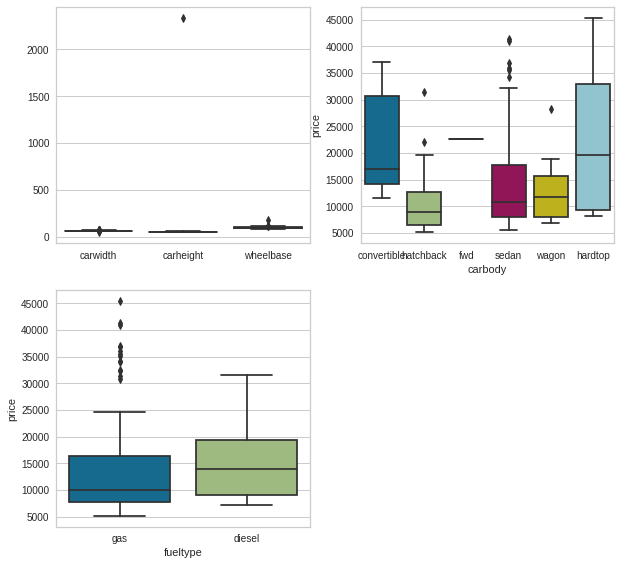

In [ ]:
#Boxplot-display the summary of the set of data values having properties like minimum, 
#first quartile, median, third quartile and maximum.

plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
df3=ds[['carwidth','carheight','wheelbase']]
sns.boxplot(data=df3)
plt.subplot(4,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = ds)
plt.subplot(4,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = ds)
plt.show()

# **Data Visualization**

In [ ]:
ds1=ds.head(20)

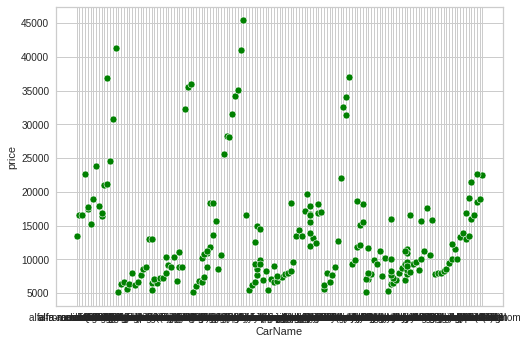

In [ ]:
plt1 = sns.scatterplot(x = 'CarName', y = 'price', data = ds,color='green');

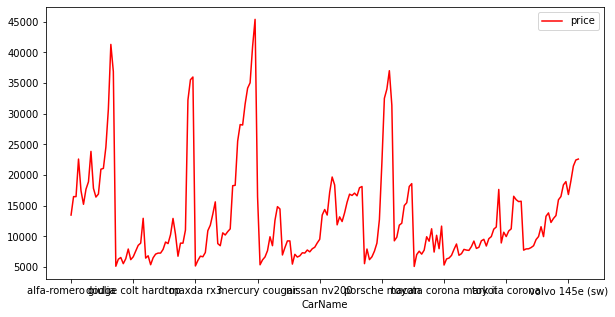

In [ ]:
ds.plot(x='CarName',y='price',figsize=(10,5), color='red',);

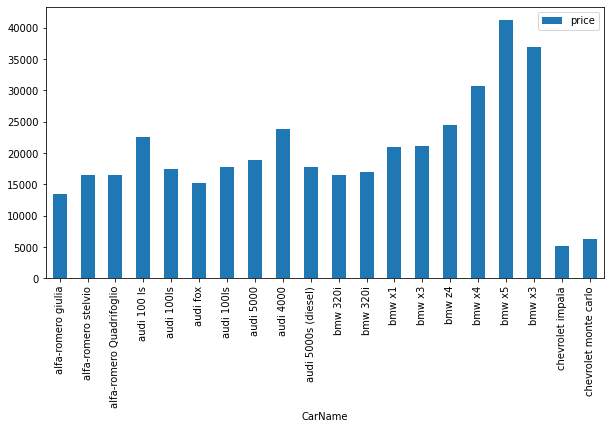

In [ ]:
ds1.plot(x='CarName',y='price',kind='bar',figsize=(10,5));

In [ ]:
#finding the correlation matrix
corr_matrix=ds.corr()

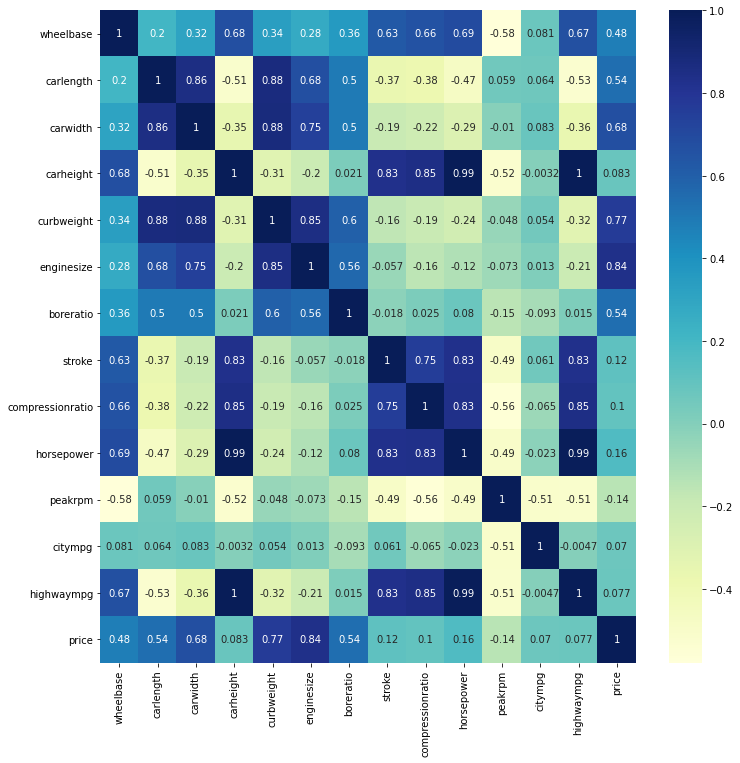

In [ ]:
#plotting the correlation matrix
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True ,cmap = 'YlGnBu')
plt.show()

In [ ]:
#removing values with high correlation
data=ds.drop(['price','enginesize'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   carbody           205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    float64
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 24.1+ KB


In [ ]:
#visualizing the data after removing unwanted columns
data

,CarName,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,alfa-romero giulia,gas,convertible,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111.0,5000,21,27
1,alfa-romero stelvio,gas,convertible,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111.0,5000,21,27
2,alfa-romero Quadrifoglio,gas,hatchback,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154.0,5000,19,26
3,audi 100 ls,gas,fwd,176.6,66.2,54.3,2337.0,109,3.40,10.00,102.00,5500.0,24,30,13950
4,audi 100ls,gas,sedan,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115.0,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,sedan,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.50,114.0,5400,23,28
201,volvo 144ea,gas,sedan,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.70,160.0,5300,19,25
202,volvo 244dl,gas,sedan,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.80,134.0,5500,18,23
203,volvo 246,diesel,sedan,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.00,106.0,4800,26,27


In [ ]:
#converting categorical varaibles to labels
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data=data.apply(l.fit_transform)

## **Splitting the dataset into train and test**

In [ ]:
x=(data.iloc[:,0:-1])
y=np.expand_dims(data.iloc[:,-1],1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Build the Regression model**

In [ ]:
#using linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
ms1=(mean_squared_error(y_test,y_pred))
r1=(r2_score(y_test,y_pred))

In [ ]:
#using Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)
ms2=(mean_squared_error(y_test,y_pred2))
r2=(r2_score(y_test,y_pred2))

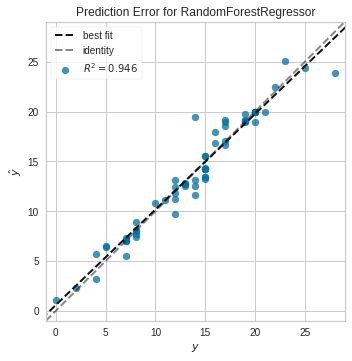

In [ ]:
from yellowbrick.regressor import PredictionError
'''A prediction error plot shows the actual targets from the dataset
 against the predicted values generated by our model.
'''
visualizer = PredictionError(rf)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
visualizer.poof() ;


In [ ]:
#using Logistic Regression model
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 
y_pred3=classifier.predict(x_test)
ms3=(mean_squared_error(y_test,y_pred3))
r3=(r2_score(y_test,y_pred3))

In [ ]:
#using Decision tree regression
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
ms4=(mean_squared_error(y_test,y_pred4))
r4=(r2_score(y_test,y_pred4))

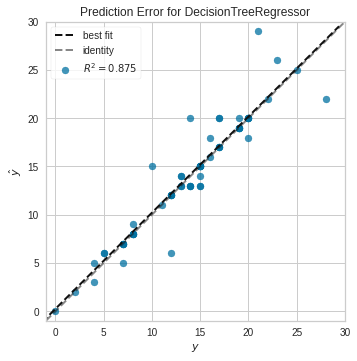

In [ ]:
visualizer = PredictionError(dt)
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
visualizer.poof() ;

In [ ]:
#using Ridge Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
y_pred5=rr.predict(x_test)
ms5=(mean_squared_error(y_test,y_pred6))
r5=(r2_score(y_test,y_pred6))

In [ ]:
model=['Linear Regression','Random Forest Regression','Logistic Regression','Decision Tree Regression','Ridge Regression']
rsme=[ms1,ms2,ms3,ms4,ms5,ms6]
r2score=[r1,r2,r3,r4,r5,r6]

In [ ]:
table=pd.DataFrame(data=zip(model,rsme,r2score),columns=['Model','RSME Value','R2 Score'])

In [ ]:
table

,Model,RSME Value,R2 Score
0,Linear Regression,3.832051,0.884034
1,Random Forest Regression,1.940784,0.941268
2,Logistic Regression,7.064516,0.786214
3,Decision Tree Regression,4.645161,0.859428
4,Ridge Regression,3.724138,0.887300
